<a href="https://colab.research.google.com/github/AlfonsoVasquezC/DataFiles/blob/main/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans**

**Alumnos:**

Alberto Patraca Sotomayor A01793469

Sinaí Avalos Rivera A01730466

**Materia:** Ciencia y analítica de datos

**Profesora:** María de la Paz Rico Fernández

**Fecha:** 11 de noviembre de 2022

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns

Obtención del conjunto de datos y creación del dataframe:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-SinaiAvalos/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


**LIMPIEZA DEL DATAFRAME**



In [3]:
#Obtenemos la información de los atributos del conjunto de datos (índice, nombre de las columnas y los valores no nulos )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [4]:
#Total de valores nulos por columna

df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [5]:
#Total de valores nulos en el dataframe
df.isnull().sum().sum()

1532

Dejamos únicamente las variables que, observando el dataframe, sabemos que son contínuas, eliminando las categóricas.

In [6]:
col_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                 'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_varnumericas = df[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                 'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_varnumericas               

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


Observaremos los valores dentro de cada una de las columnas para identificar valores atípicos.

In [7]:
for col in col_numericas:
  print("\nColumna: " + col)
  print("Sumatoria de valores en la columna")
  print(df_varnumericas[col].value_counts())


Columna: ALC_mg/L
Sumatoria de valores en la columna
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

Columna: CONDUCT_mS/cm
Sumatoria de valores en la columna
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64

Columna: SDT_M_mg/L
Sumatoria de valores en la columna
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64

Columna: FLUORUROS_mg/L
Sumatoria de valores en la columna
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64

Columna: DUR_mg/L

Como se observa, las siguientes columnas contienen valores que deberán ser remplazados para poder trabajar con el conjunto de datos: FLUORUROS_mg/L, DUR_mg/L, COLI_FEC_NMP/100_mL,N_NO3_mg/L, AS_TOT_mg/L, CD_TOT_mg/L, CR_TOT_mg/L, HG_TOT_mg/L, PB_TOT_mg/L, MN_TOT_mg/L, FE_TOT_mg/L.

In [8]:
for col in col_numericas:
  df_varnumericas[col] = df_varnumericas[col].replace('<0.2', 0.2) 
  df_varnumericas[col] = df_varnumericas[col].replace('<20',20)  
  df_varnumericas[col] = df_varnumericas[col].replace('<1.1',1.1) 
  df_varnumericas[col] = df_varnumericas[col].replace('<0.02',0.02) 
  df_varnumericas[col] = df_varnumericas[col].replace('<0.01',0.01)  
  df_varnumericas[col] = df_varnumericas[col].replace('<0.003',0.003)  
  df_varnumericas[col] = df_varnumericas[col].replace('<0.005',0.005)  
  df_varnumericas[col] = df_varnumericas[col].replace('<0.0005',0.0005)  
  df_varnumericas[col] = df_varnumericas[col].replace('<0.0015',0.0015)  
  df_varnumericas[col] = df_varnumericas[col].replace('<0.025',0.025)  
  df_varnumericas[col] = df_varnumericas[col].replace('<25',25)  
  df_varnumericas[col] = df_varnumericas[col].astype('float')
  

for col in col_numericas:
  print("\nColumna: " + col)
  print("Sumatoria de valores en la columna")
  print(df_varnumericas[col].value_counts())




Columna: ALC_mg/L
Sumatoria de valores en la columna
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

Columna: CONDUCT_mS/cm
Sumatoria de valores en la columna
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64

Columna: SDT_M_mg/L
Sumatoria de valores en la columna
496.0000     4
320.0000     4
292.0000     4
317.0000     4
380.0000     4
            ..
148.0000     1
224.0000     1
392.0000     1
1736.0000    1
690.6667     1
Name: SDT_M_mg/L, Length: 925, dtype: int64

Columna: FLUORUROS_mg/L
Sumatoria de valores en la columna
0.2000    162
0.4660      3
0.5202      3
0.4993      2
0.4820      2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64

Column

In [9]:
df_varnumericas.isnull().sum()

ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [10]:
#Reemplazamos por la media los valores nulos de las columnas 

df_varnumericas['ALC_mg/L'].fillna(df_varnumericas['ALC_mg/L'].mean(), inplace=True)
df_varnumericas['CONDUCT_mS/cm'].fillna(df_varnumericas['CONDUCT_mS/cm'].mean(), inplace=True)
df_varnumericas['SDT_M_mg/L'].fillna(df_varnumericas['SDT_M_mg/L'].mean(), inplace=True)
df_varnumericas['DUR_mg/L'].fillna(df_varnumericas['DUR_mg/L'].mean(), inplace=True)
df_varnumericas['N_NO3_mg/L'].fillna(df_varnumericas['N_NO3_mg/L'].mean(), inplace=True)

#Verificamos que no se tenga ya ningún valor nulo en el dataframe
df_varnumericas.isnull().sum().sum()

0

**EXPLORACIÓN DEL DATAFRAME**



In [11]:
df_varnumericas.describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,116.655014,1242.056683,2748.950627,1.924278,359.500870,2052.457014,8.341222,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,215.825000,822.500000,551.400000,0.503500,245.662350,1.100000,2.082916,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [12]:
df_varnumericas.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.219654,0.079285,0.068932,0.242957,-0.016448,-0.000394,0.073289,0.032686,-0.014282,0.067193,0.015064,0.129861,0.043423
CONDUCT_mS/cm,0.219654,1.000000,0.286406,-0.025177,0.692270,0.017807,0.219331,-0.003682,0.029040,0.004412,0.059089,0.024082,0.095925,0.083177
SDT_M_mg/L,0.079285,0.286406,1.000000,-0.013796,0.347115,-0.001133,0.101594,-0.010156,0.010800,-0.000682,0.015114,-0.005552,0.018927,0.020104
FLUORUROS_mg/L,0.068932,-0.025177,-0.013796,1.000000,-0.149676,0.003564,-0.019780,0.444079,-0.015123,-0.005242,-0.026358,-0.032236,-0.049742,-0.009994
DUR_mg/L,0.242957,0.692270,0.347115,-0.149676,1.000000,0.031727,0.301410,-0.106494,0.025002,0.007438,0.064781,-0.018908,0.083821,0.059775
COLI_FEC_NMP/100_mL,-0.016448,0.017807,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008840,-0.007661,0.022510,-0.005326,0.003045
N_NO3_mg/L,-0.000394,0.219331,0.101594,-0.019780,0.301410,-0.000969,1.000000,-0.008019,-0.009362,-0.015131,0.014912,-0.016529,-0.036854,0.013298
AS_TOT_mg/L,0.073289,-0.003682,-0.010156,0.444079,-0.106494,0.038151,-0.008019,1.000000,-0.009078,-0.009582,-0.009939,-0.023057,0.016916,0.014295
CD_TOT_mg/L,0.032686,0.029040,0.010800,-0.015123,0.025002,-0.001656,-0.009362,-0.009078,1.000000,-0.001781,-0.004083,-0.002875,-0.004205,-0.001036
CR_TOT_mg/L,-0.014282,0.004412,-0.000682,-0.005242,0.007438,-0.008840,-0.015131,-0.009582,-0.001781,1.000000,0.005866,-0.001895,-0.005087,0.000629


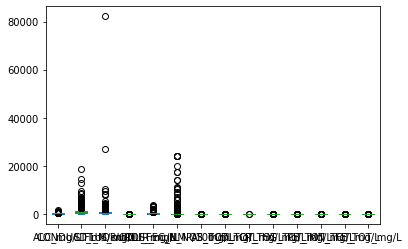

In [13]:
df_varnumericas.plot.box()

ALC_mg/L Box Plot


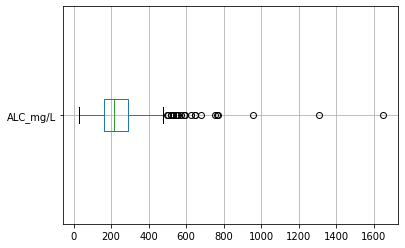

CONDUCT_mS/cm Box Plot


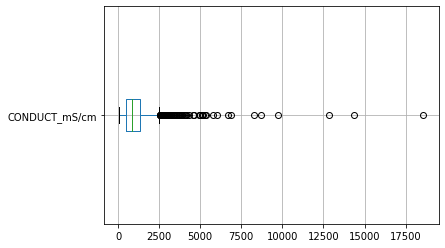

SDT_M_mg/L Box Plot


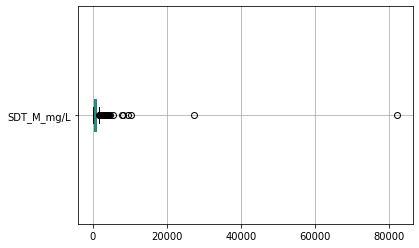

FLUORUROS_mg/L Box Plot


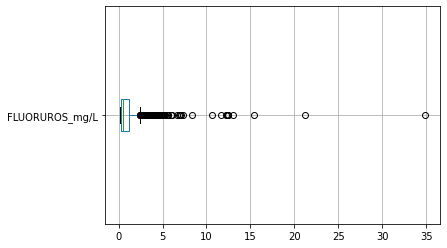

DUR_mg/L Box Plot


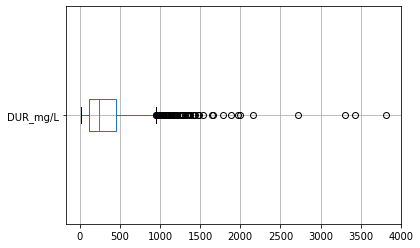

COLI_FEC_NMP/100_mL Box Plot


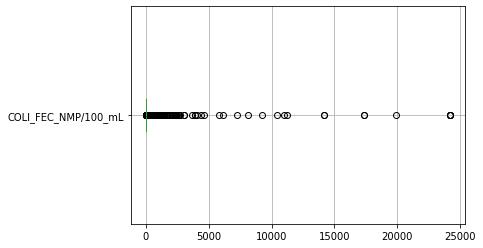

N_NO3_mg/L Box Plot


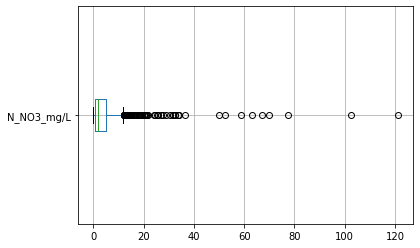

AS_TOT_mg/L Box Plot


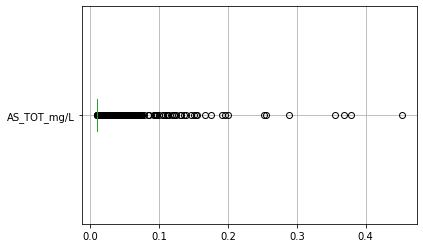

CD_TOT_mg/L Box Plot


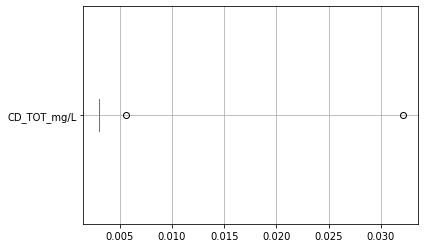

CR_TOT_mg/L Box Plot


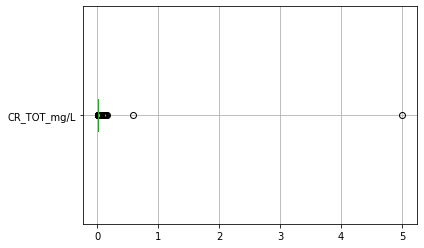

HG_TOT_mg/L Box Plot


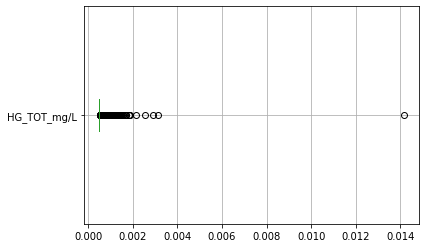

PB_TOT_mg/L Box Plot


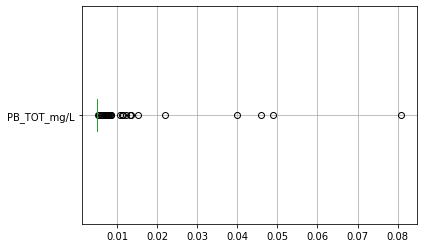

MN_TOT_mg/L Box Plot


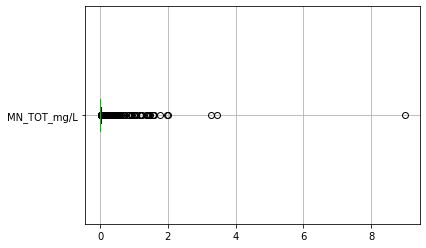

FE_TOT_mg/L Box Plot


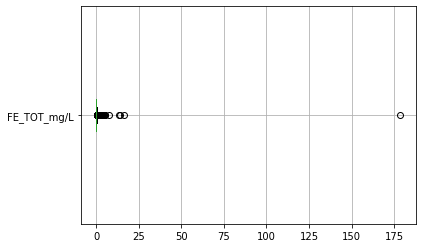

In [14]:
for column in df_varnumericas.columns:
  print(f'{column} Box Plot')
  df_varnumericas[[column]].boxplot(vert=False)
  plt.show()

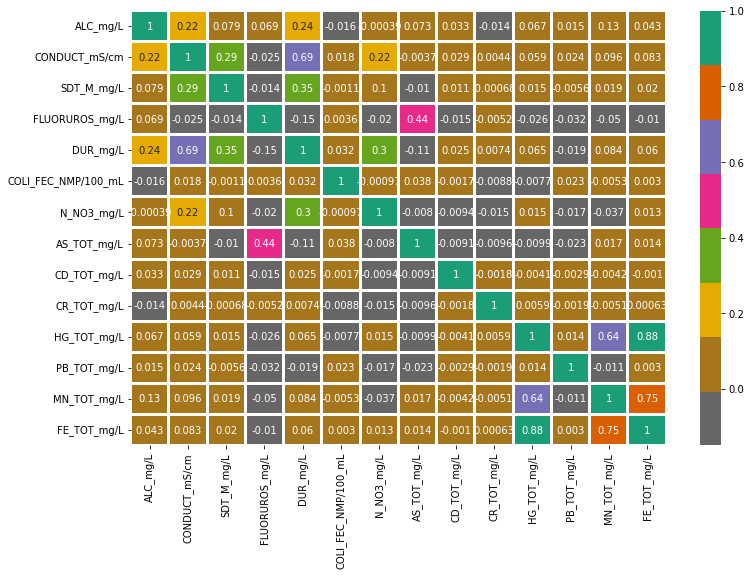

In [16]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df_varnumericas.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()